# **Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# read the dataset using pandas

In [2]:
df = pd.read_csv("E:/python/project_5/Industrial_Copper/Copper_Set.xlsx - Result 1.csv")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
# verify the number of unique values in each features

for i in df.columns:
    print(i ,":", df[i].nunique())


id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [5]:
# id feature have all the values are unique. This feature not used for prediction. So we can drop the id column
# verify datatypes of all features    

df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [7]:
# converting the string to numeric

df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"] = pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"] = pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date


In [8]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [9]:
df.dtypes

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
material_ref        object
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

In [10]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [11]:
# check any null values in data

df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [12]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [13]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [15]:
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64

In [16]:
# materi
df.drop(columns=["material_ref","id"],inplace=True)

In [17]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [19]:
df.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery_date_1     3
dtype: int64

In [20]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df["quantity tons"] = df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"] = df["selling_price"].apply(lambda x:np.nan if x<=0 else x)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181668.0,5.875066e+03,2.349107e+06,1.000000e-05,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181665.0,1.918124e+03,3.318020e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [22]:
# check null values for all features
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [23]:
df.dtypes

item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

In [24]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [25]:
# handling the null values by using mode and median
# Median---> middle values in dataset(asc/dec), Mode--->value apply that appears most frequesntly in dataset

# ibject datatype using mode

df["item_date"].fillna(df["item_date"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)

#numerical datatype using median

df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [26]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [27]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [28]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [29]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df["status"]=df["status"].map({'Lost':0,'Won':1,'Draft':2,'To be approved':3,'Not lost for AM':4,'Wonderful':5,'Revised':6,
                               'Offered':7,'Offerable':8})

df

In [30]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
df["item type"] = OrdinalEncoder().fit_transform(df[["item type"]])

In [31]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [32]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [34]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [35]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

# ****SKEWNESS HANDLING WITH LOG FUNCTION****

In [37]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df,column):

    # boxplot
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title("boxplot for"+" "+column)
    plt.show()

    # histogram plot
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,kde=True,bins=20,color='salmon')
    plt.title("histogram for"+" "+column)
    plt.show()

    # distplot
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,2)
    sns.distplot(df[column])
    plt.title("distplot for"+" "+column)
    plt.show()

    # violin plot
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column,color='green')
    plt.title("violinplot for"+" "+column)
    plt.show()


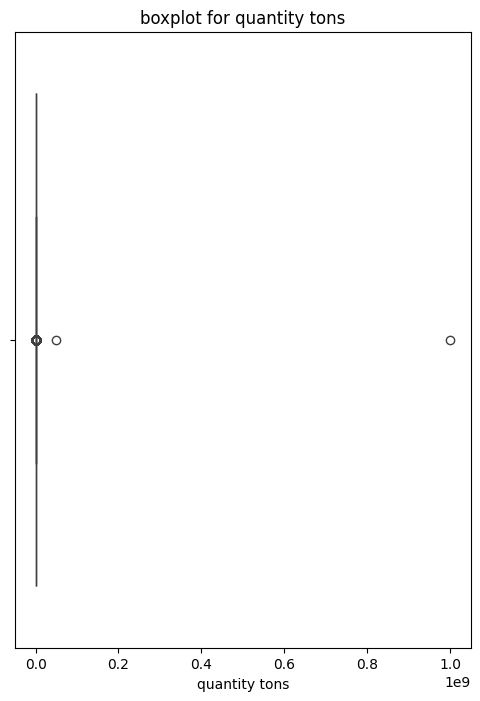

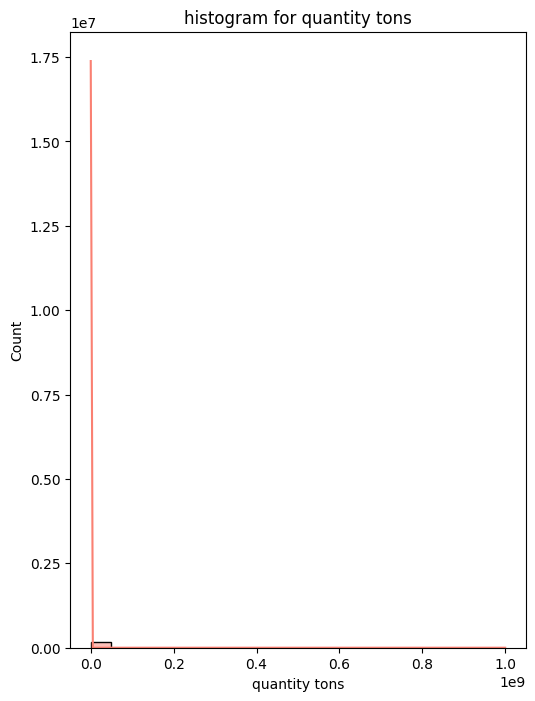

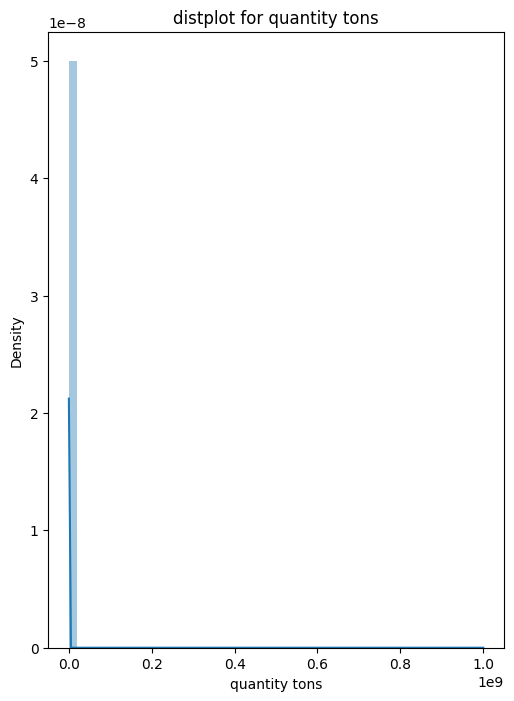

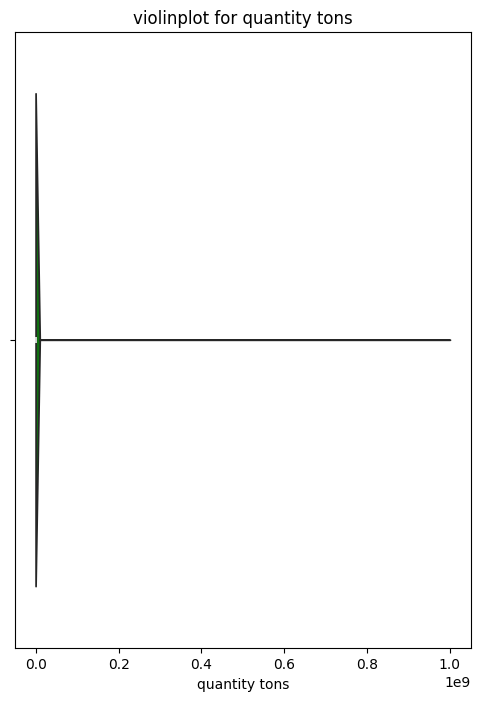

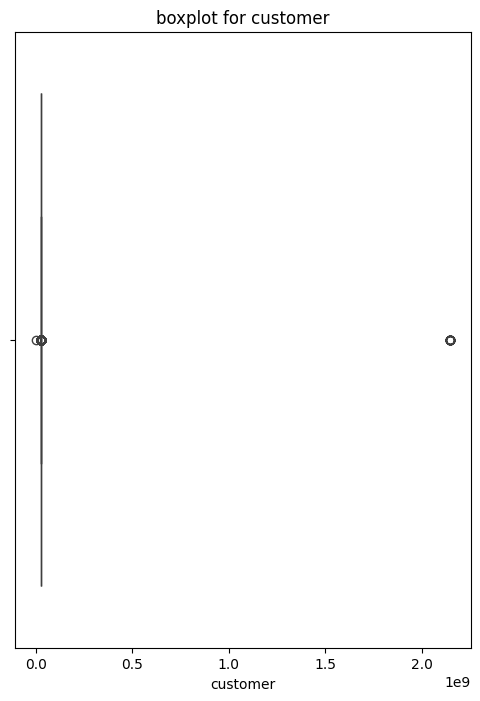

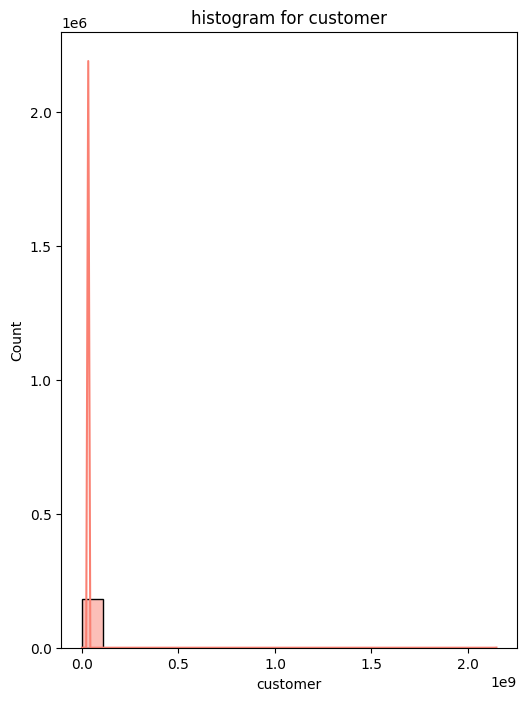

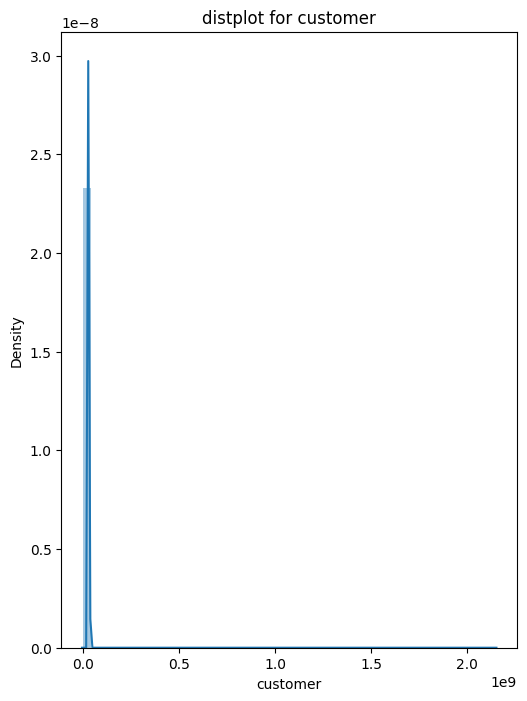

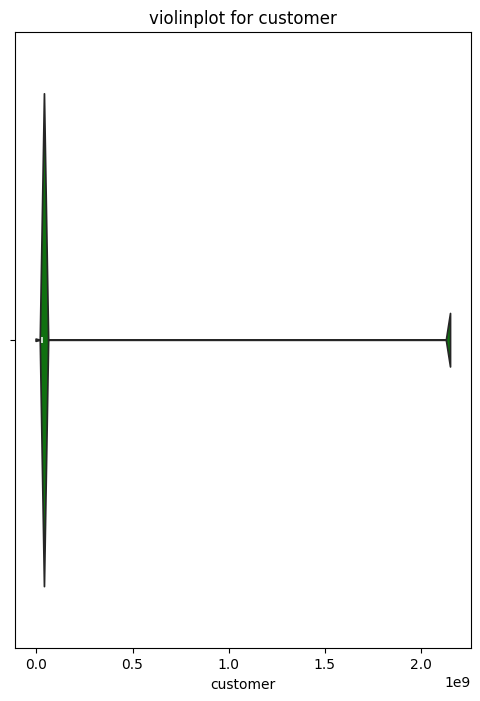

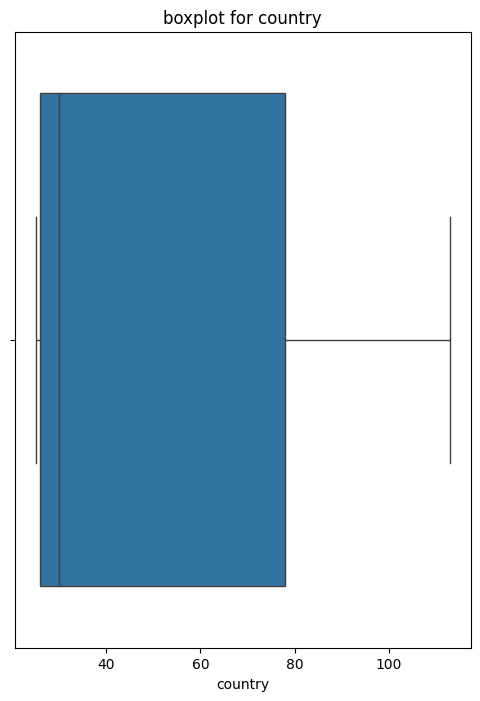

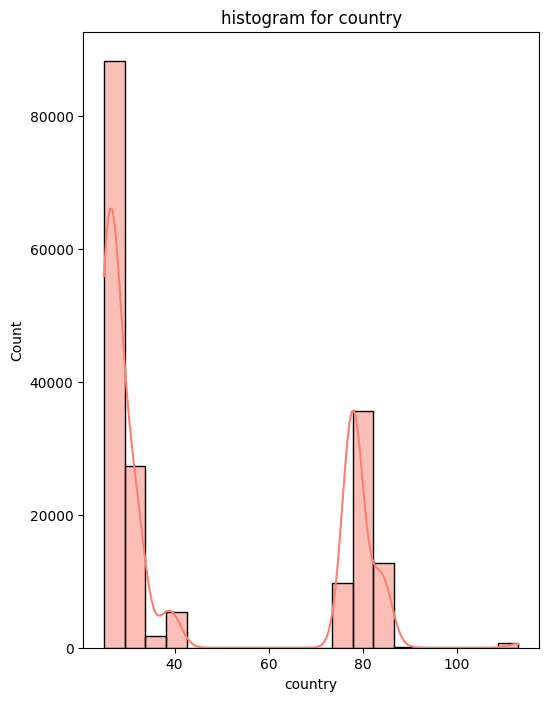

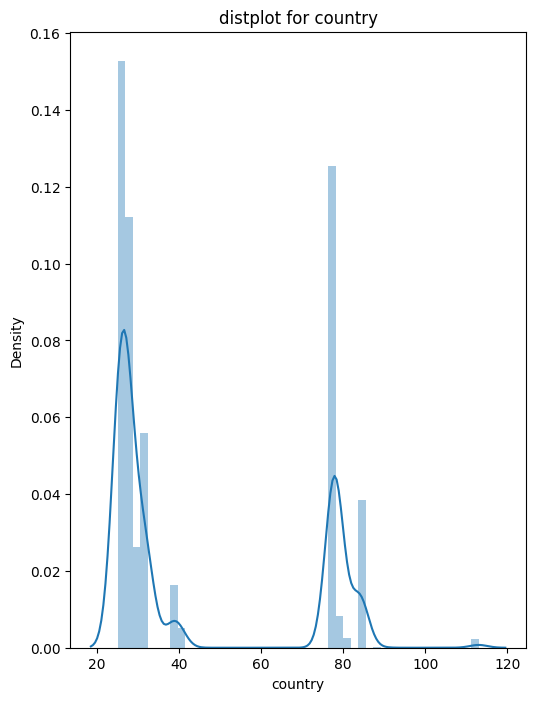

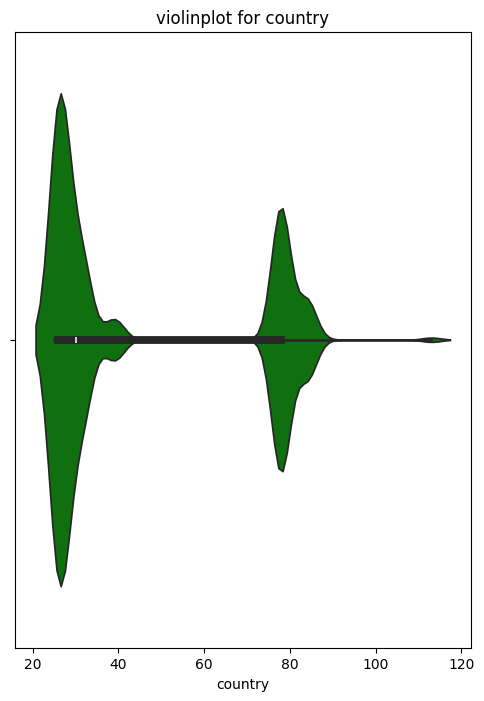

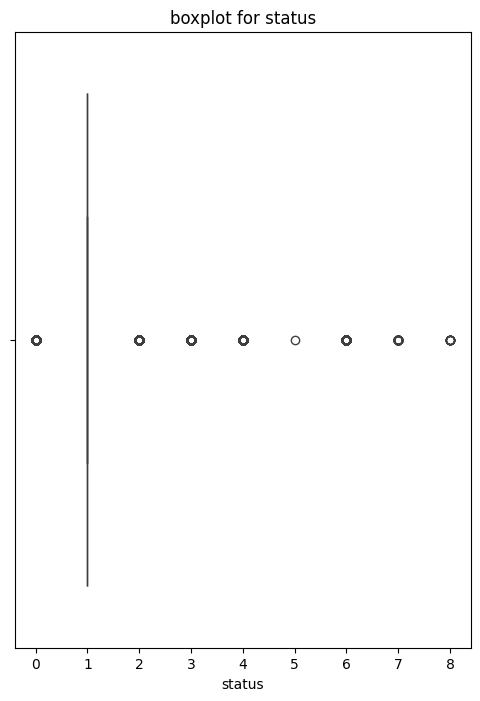

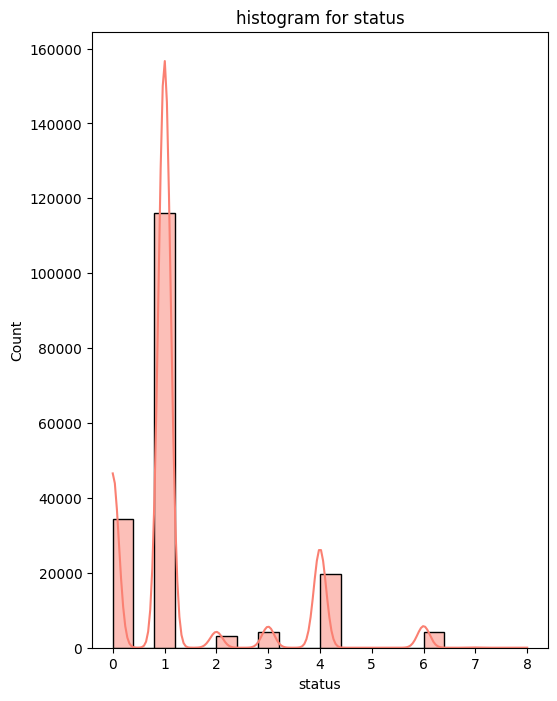

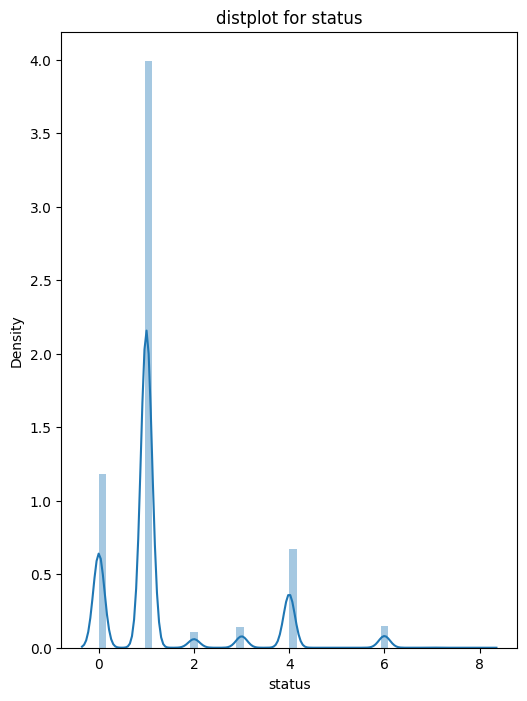

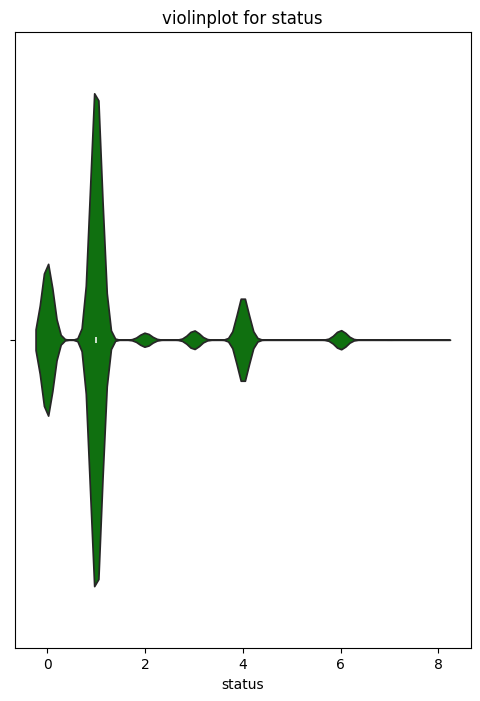

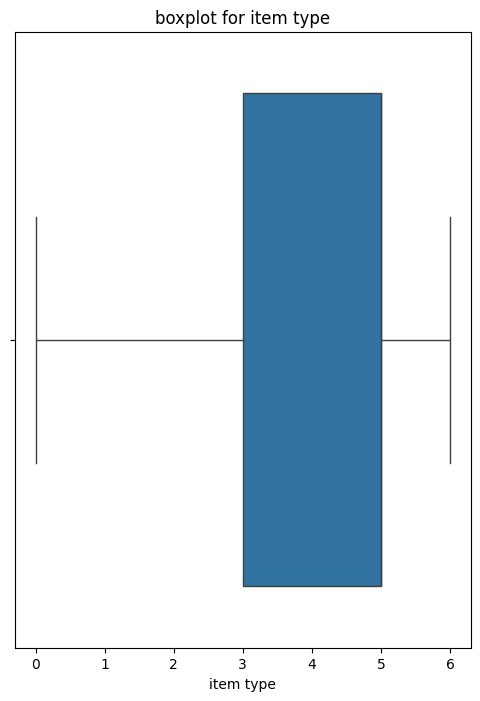

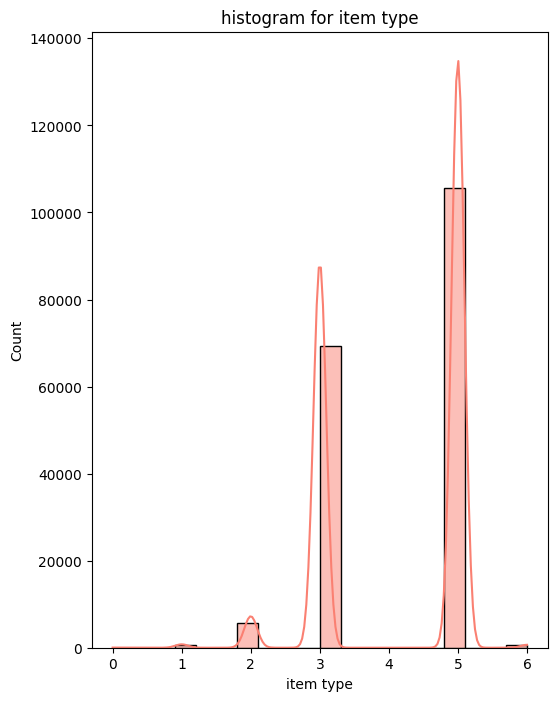

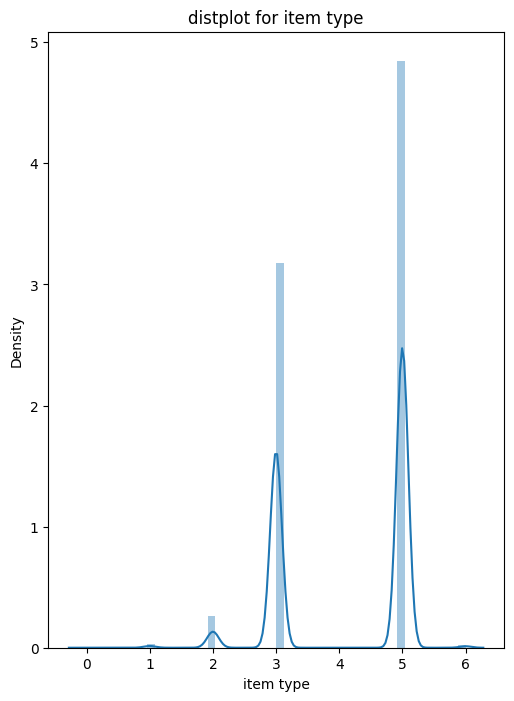

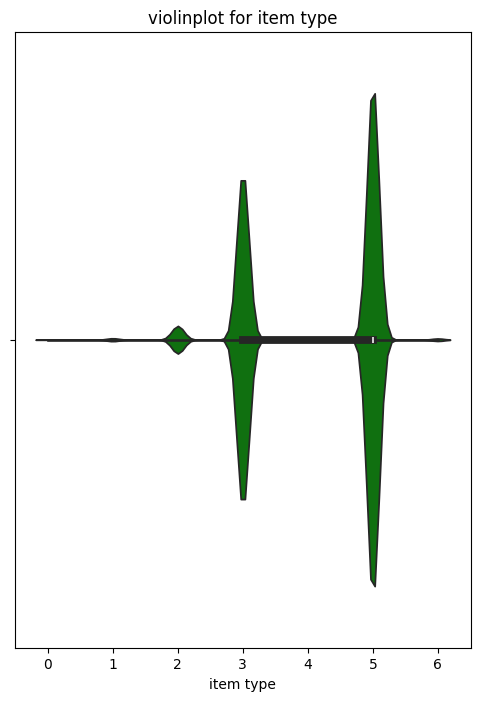

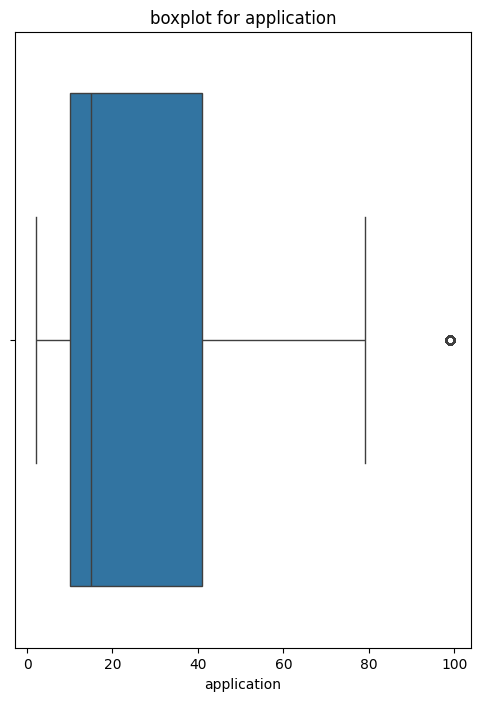

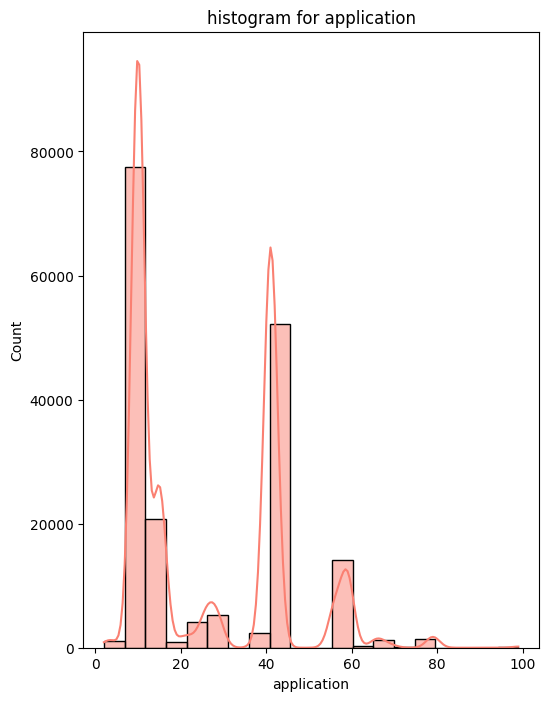

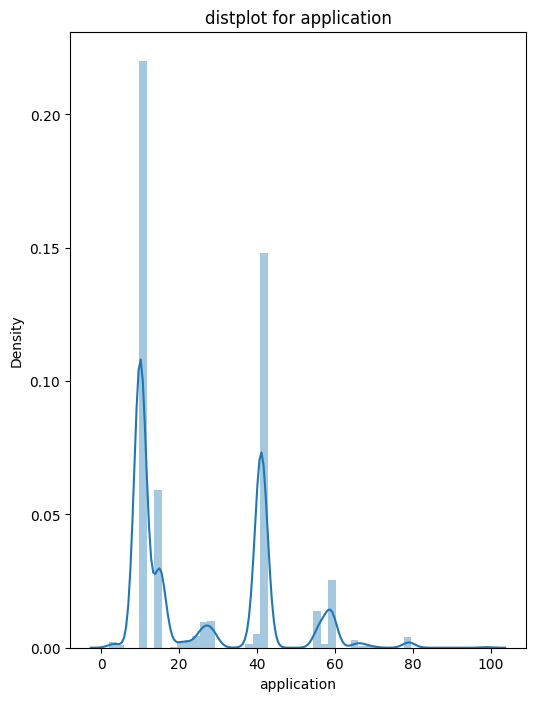

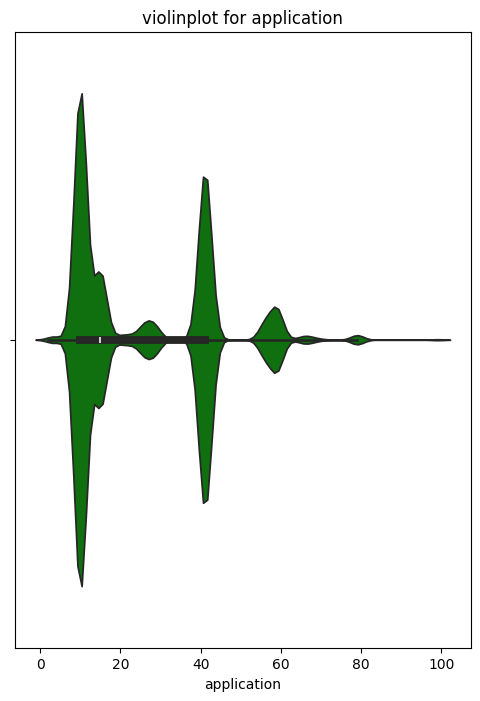

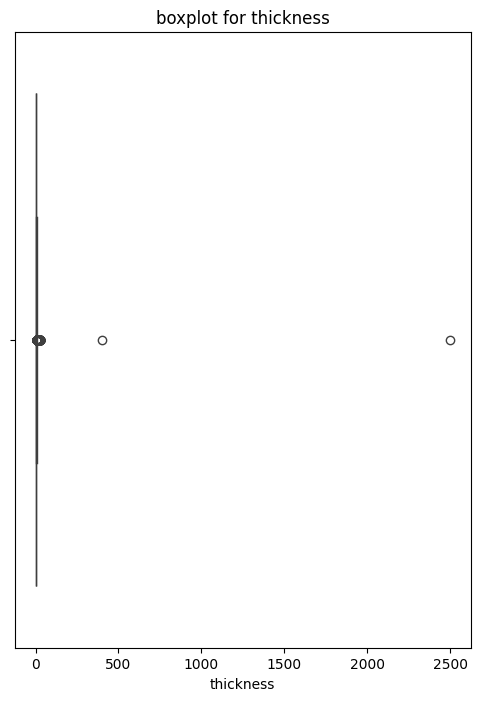

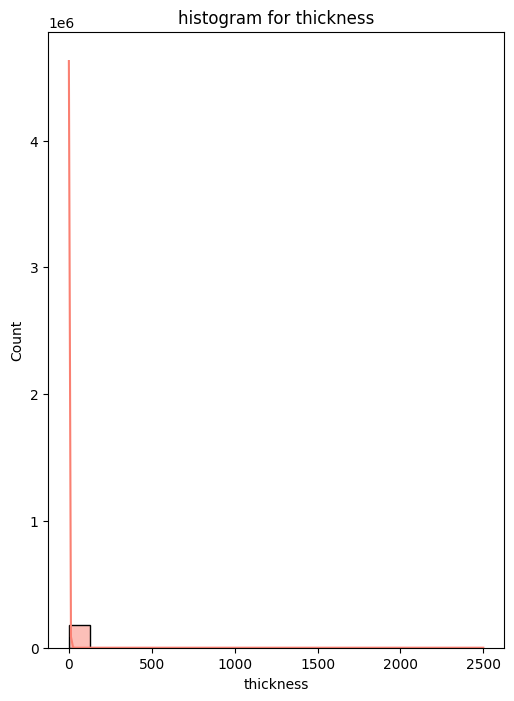

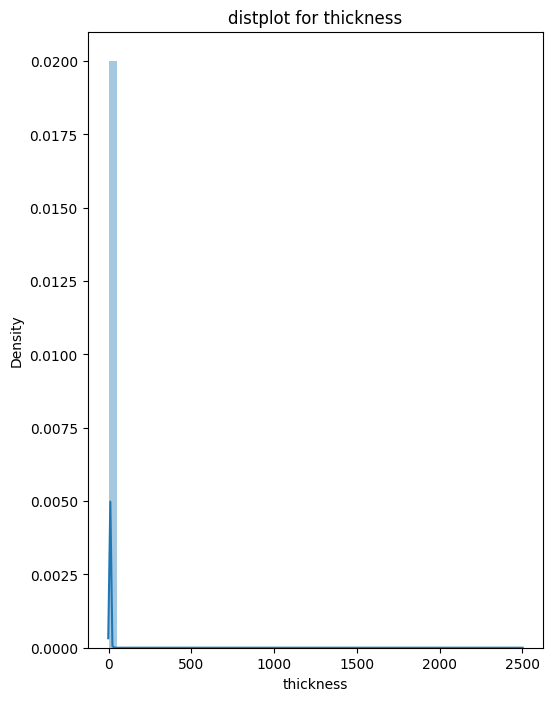

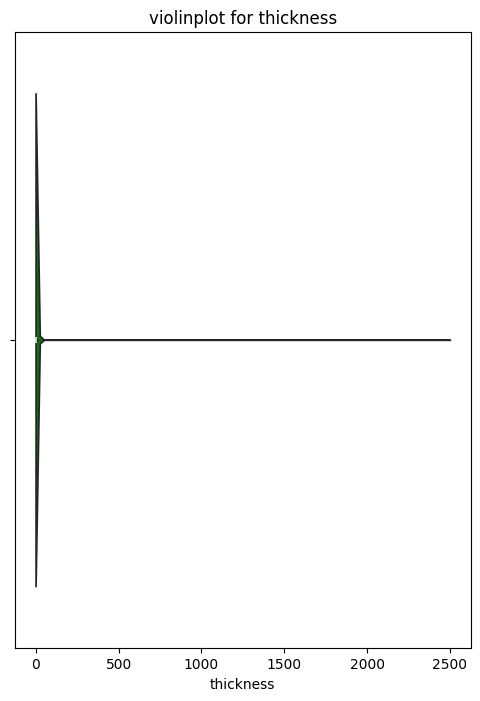

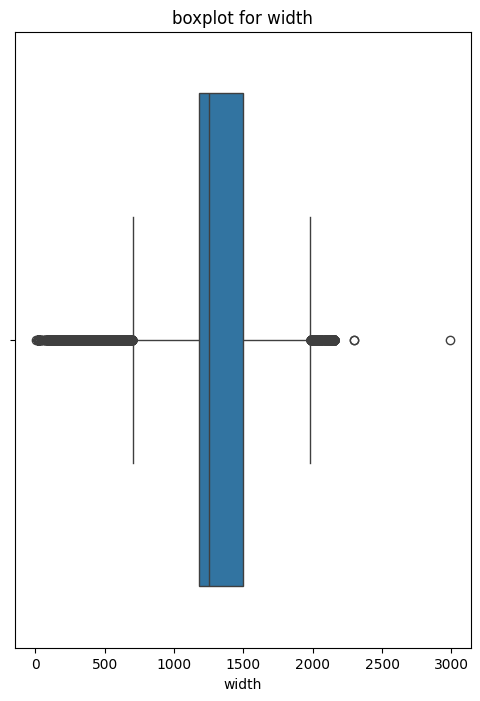

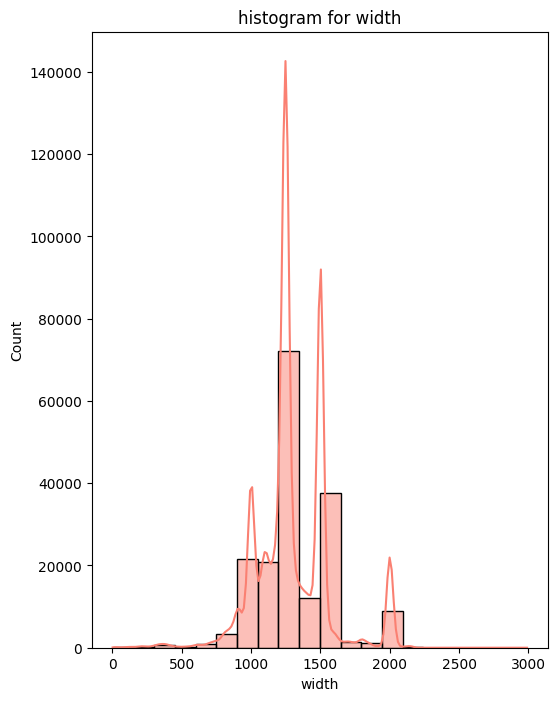

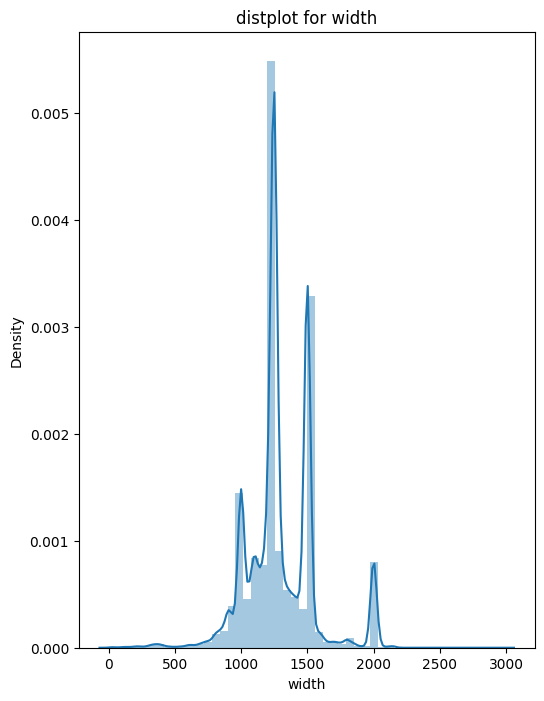

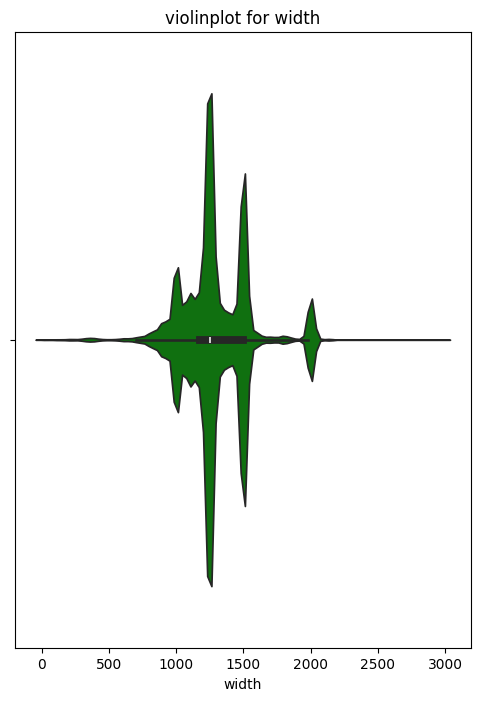

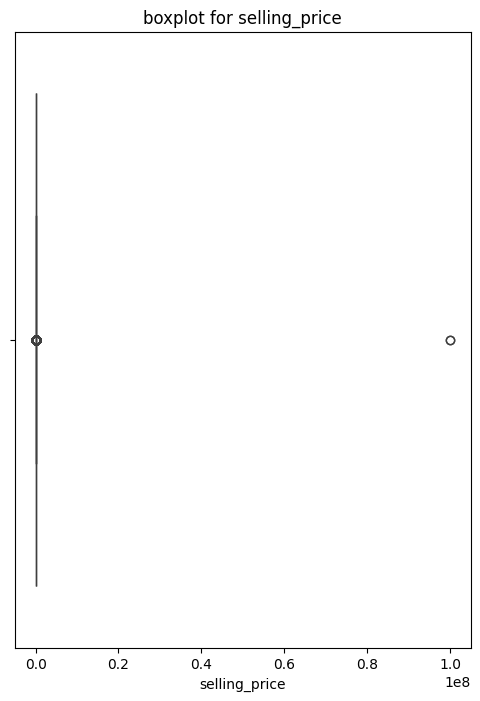

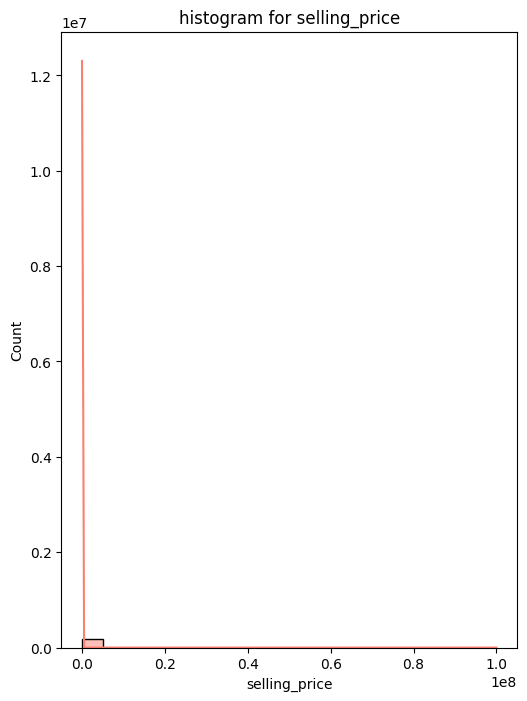

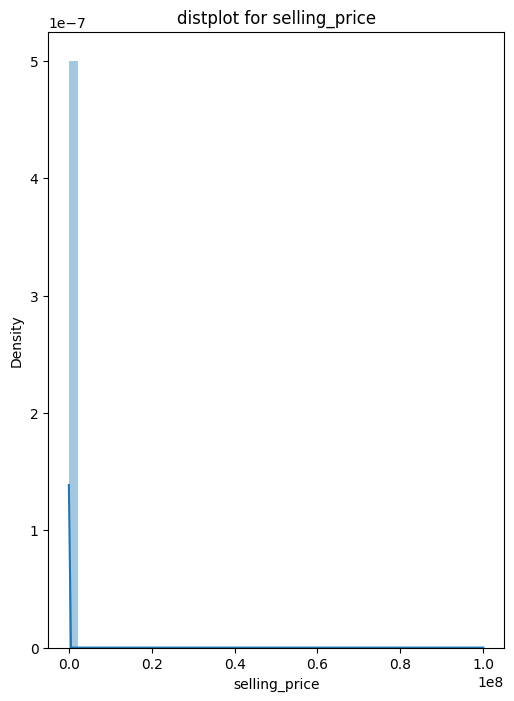

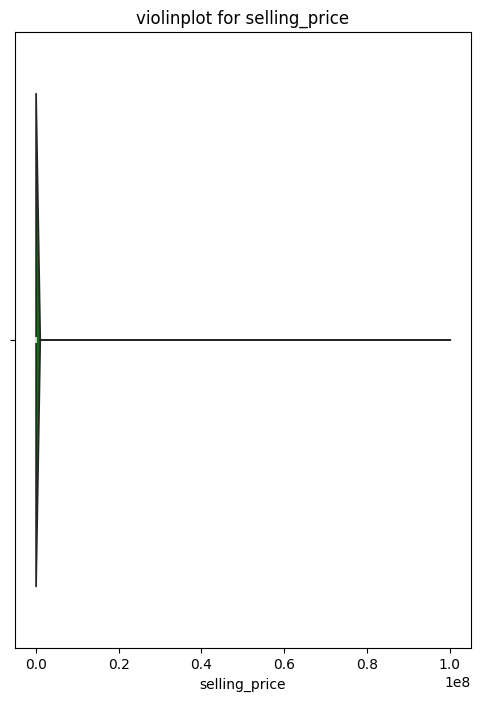

In [38]:
columns = ['quantity tons', 'customer', 'country', 'status',
           'item type', 'application', 'thickness', 'width',
           'selling_price']
for i in columns:
    plot(df,i)
 

In [39]:
# quantity tons,thickness and selling price date are skwed,so using the log transfprmation method to handle the skewness date

In [39]:
df["quantity tons_log"]=np.log(df["quantity tons"])
df["thickness_log"]=np.log(df["thickness"])
df["selling_price_log"]=np.log(df["selling_price"])

In [40]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


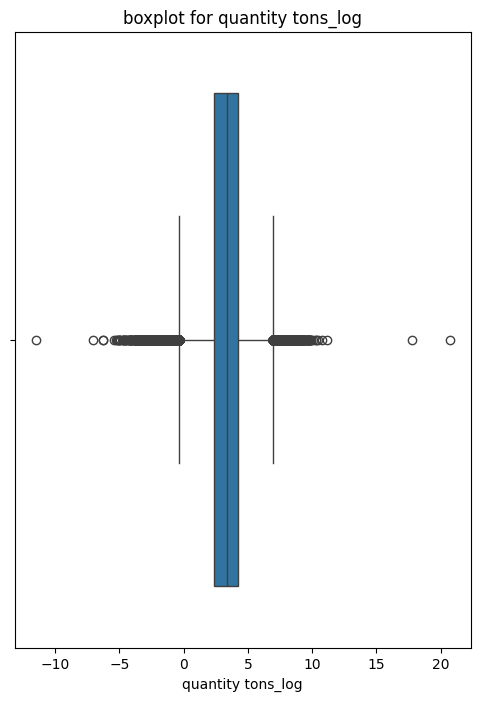

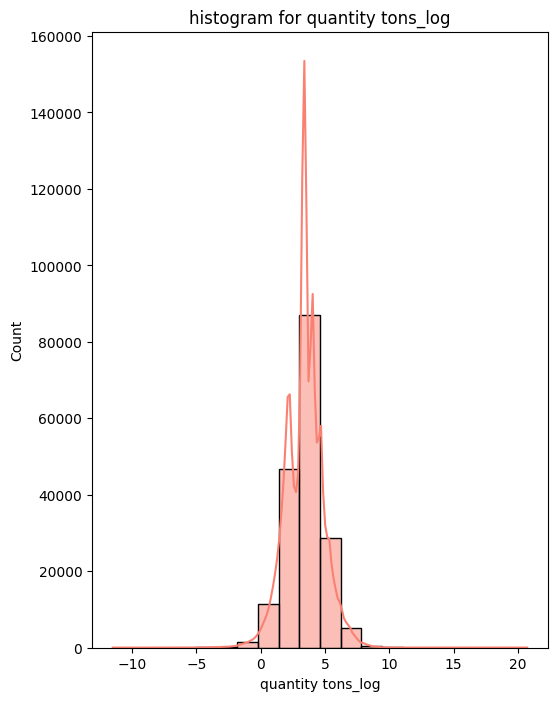

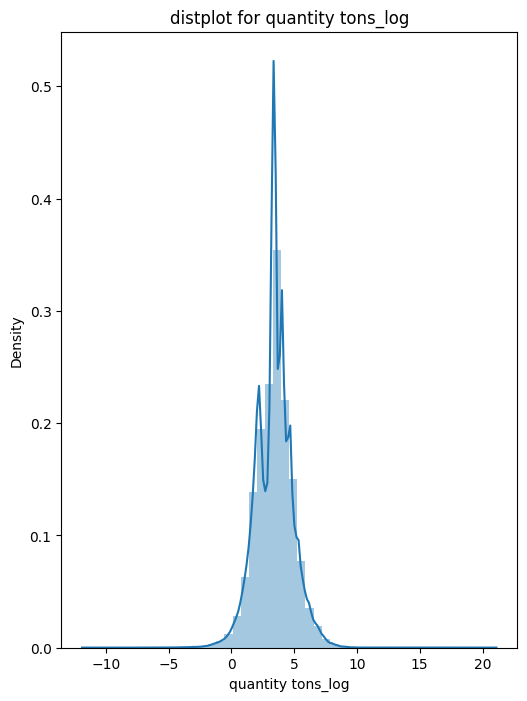

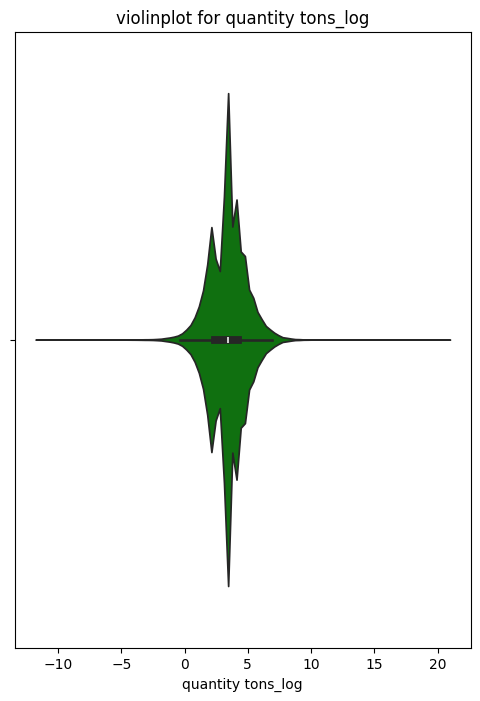

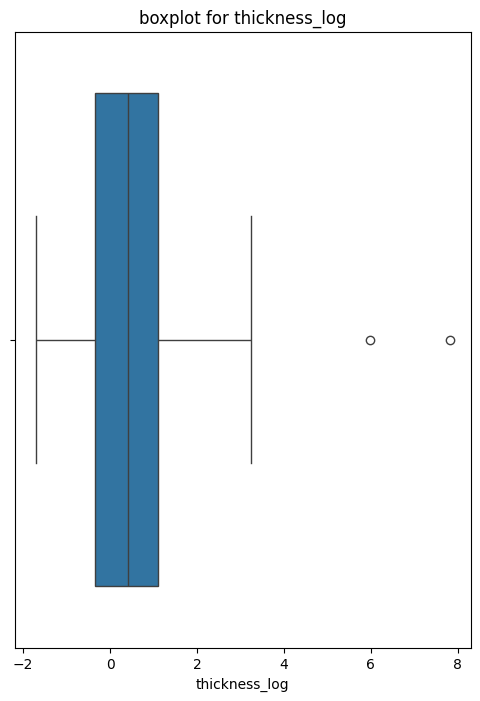

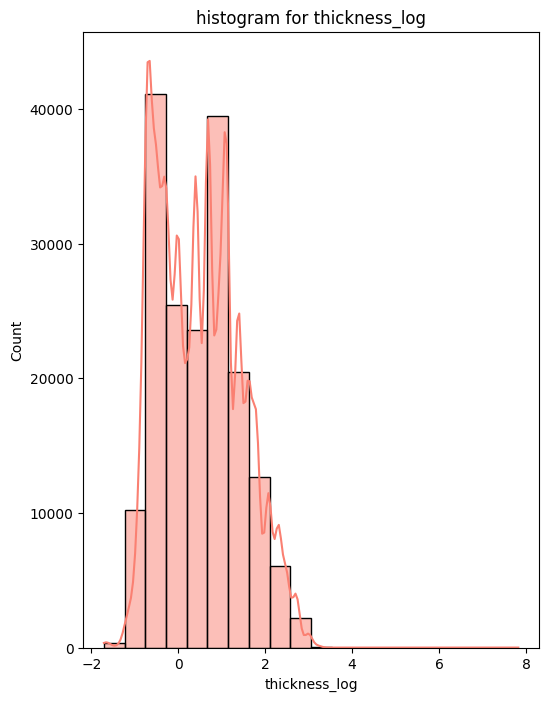

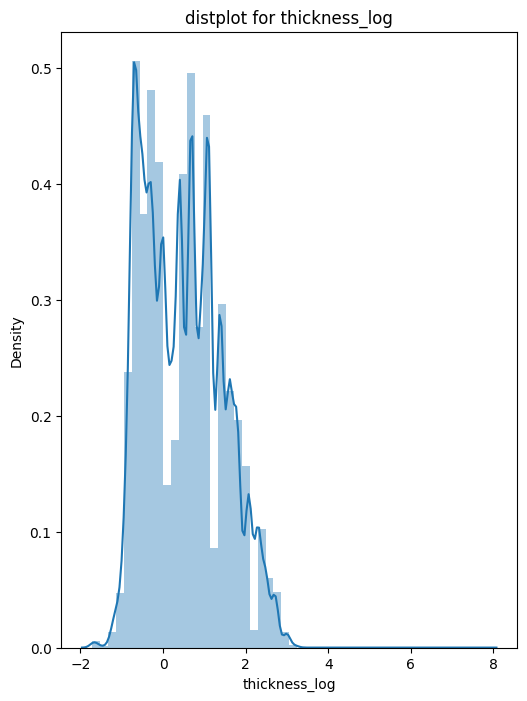

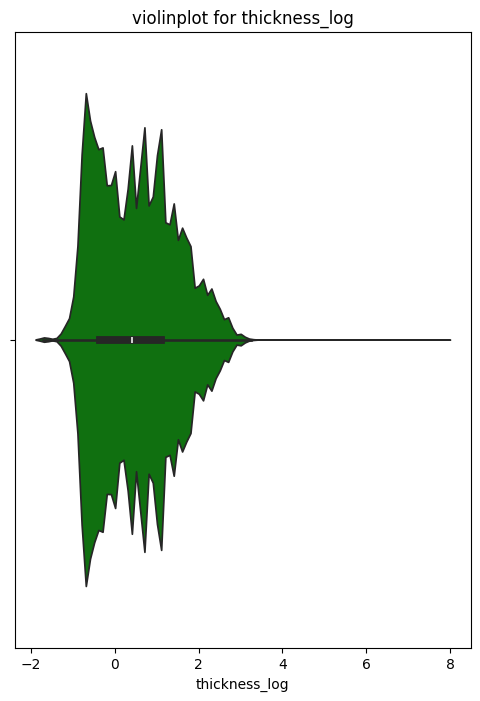

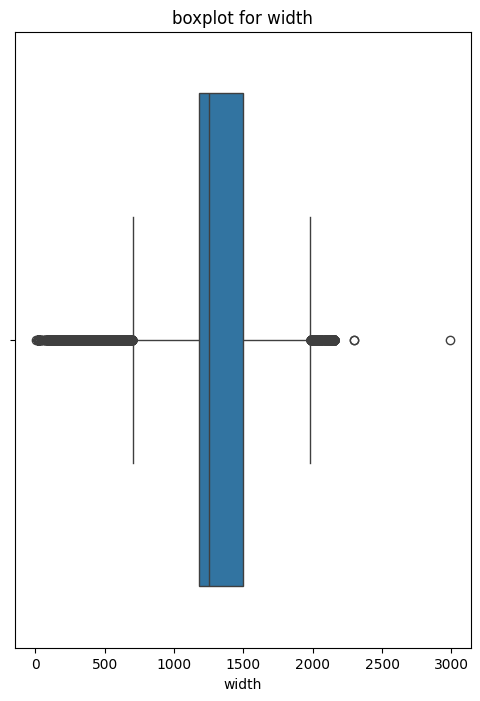

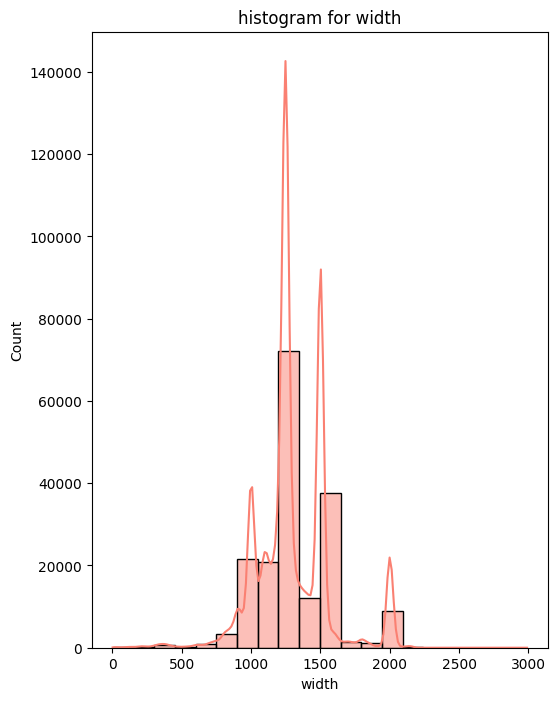

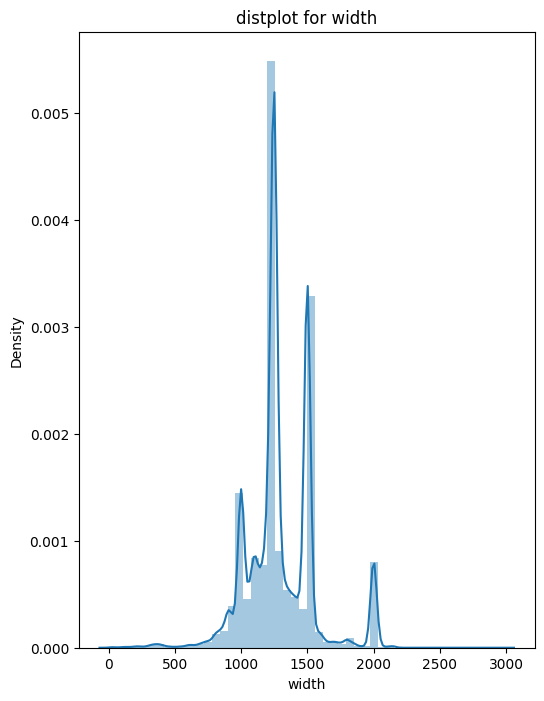

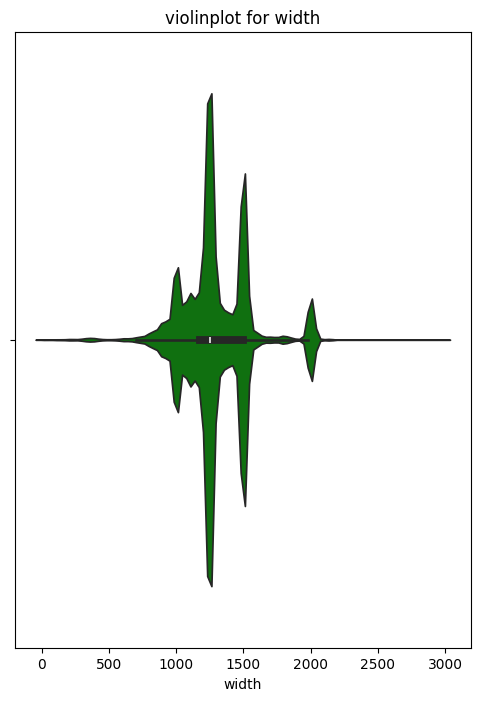

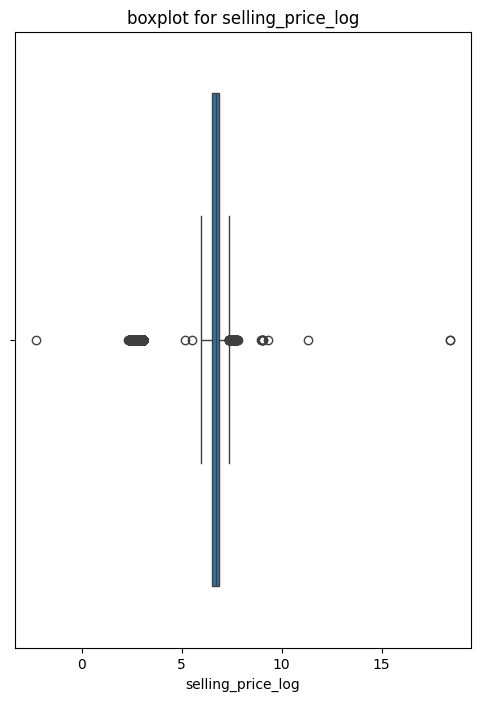

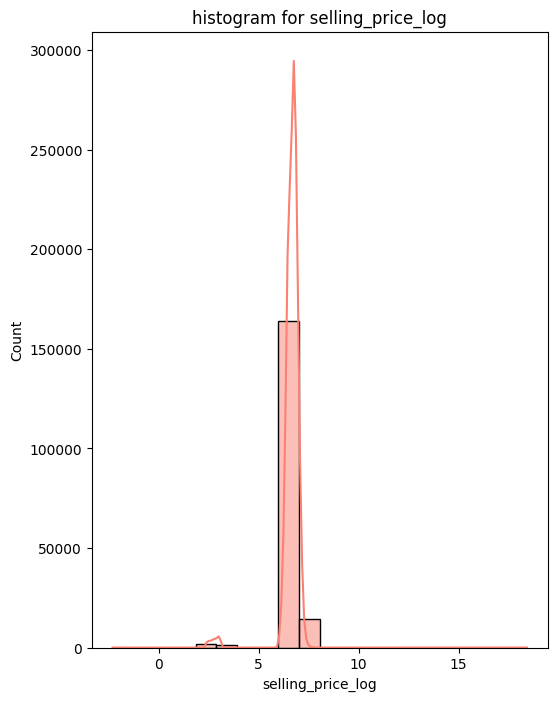

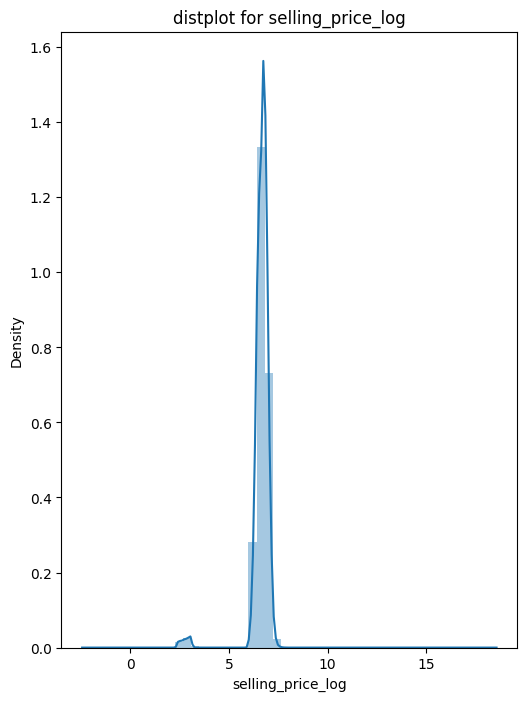

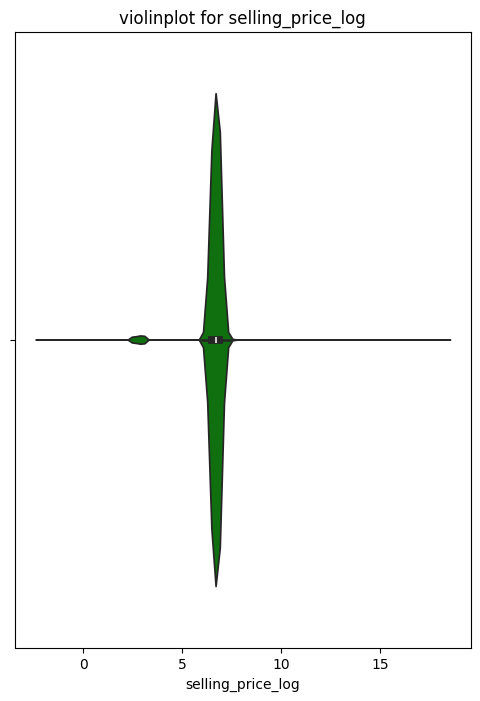

In [41]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df, i)
     


# *OUTLIERS HANDLING-INTERQUARTILE RANGE(IQR)METHOD*

In [42]:
df1 = df.copy()

In [43]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [43]:
def outlier(df1,column):
    iqr = df1[column].quantile(0.75) - df1[column].quantile(0.25)
    upper_threshold = df1[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df1[column].quantile(0.25) - (1.5*iqr)
    df1[column] = df1[column].clip(upper_threshold,lower_threshold)

In [44]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity tons_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [45]:
outlier(df1,'quantity tons_log')
outlier(df1,'thickness_log')
outlier(df1,'selling_price_log')
outlier(df1,'width')
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [46]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


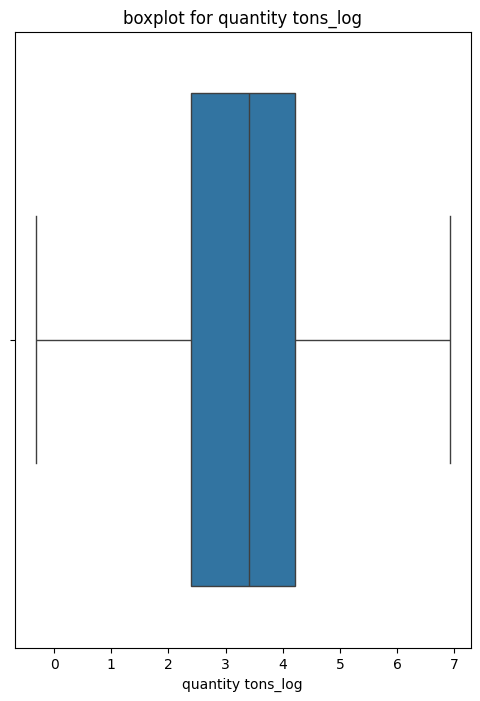

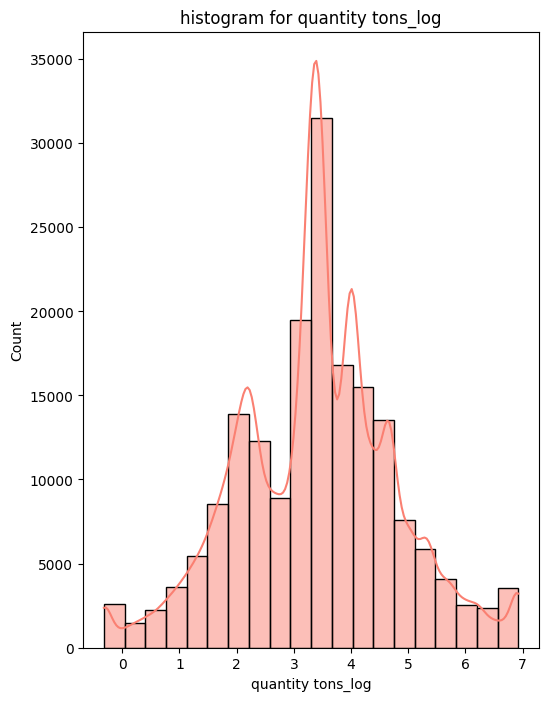

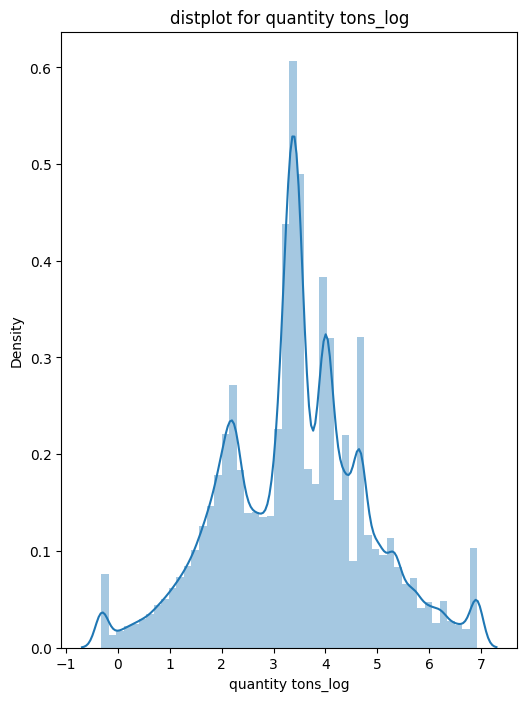

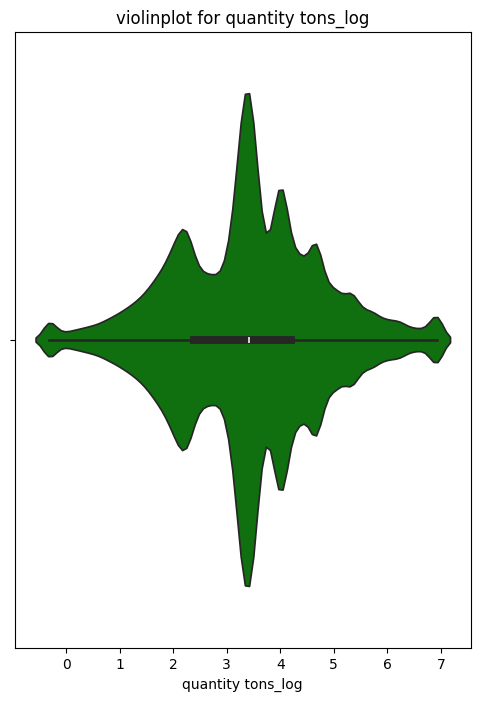

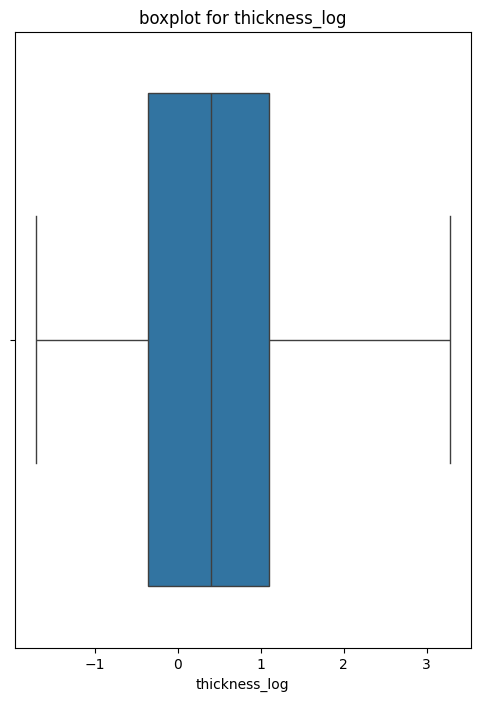

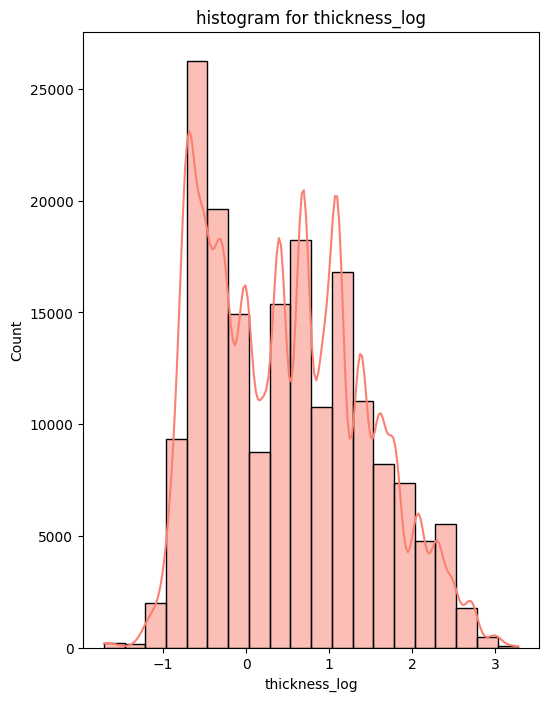

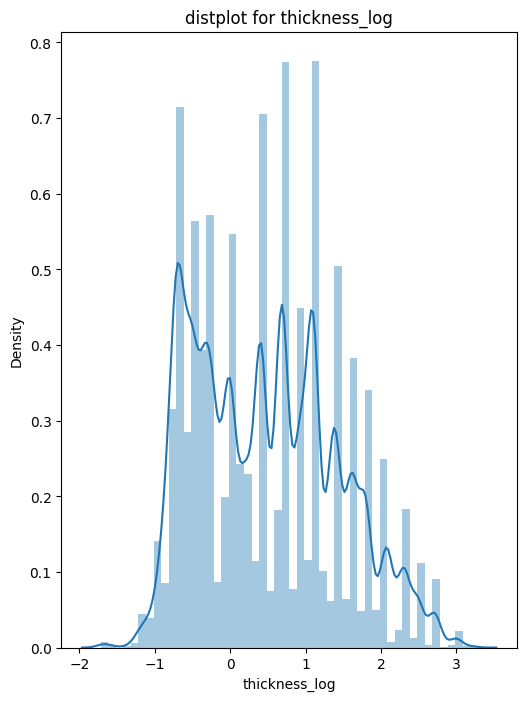

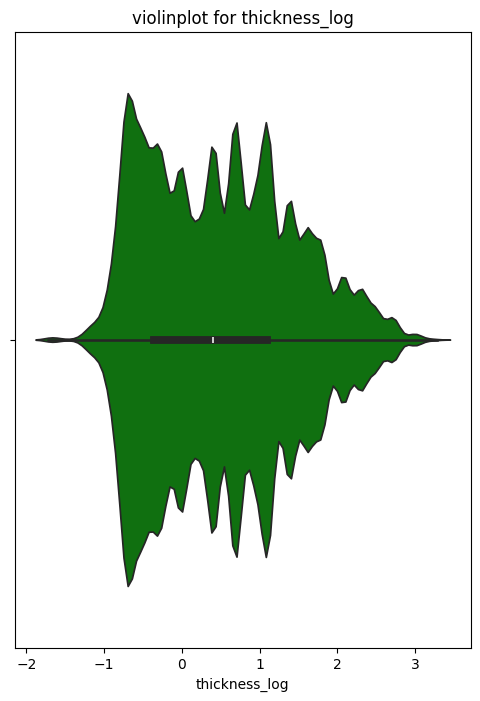

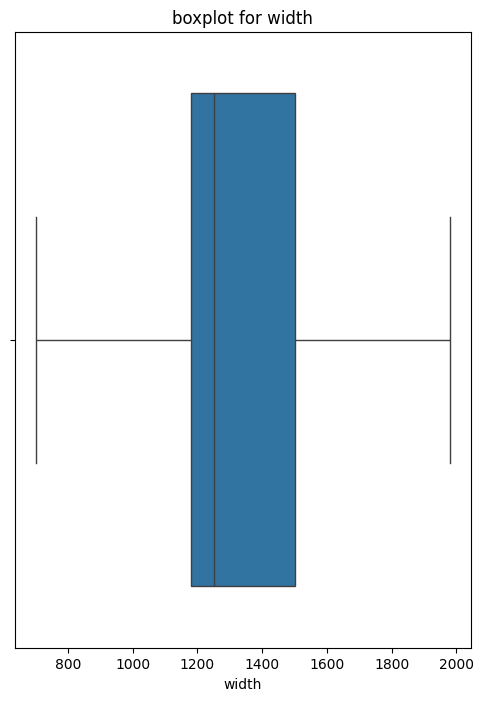

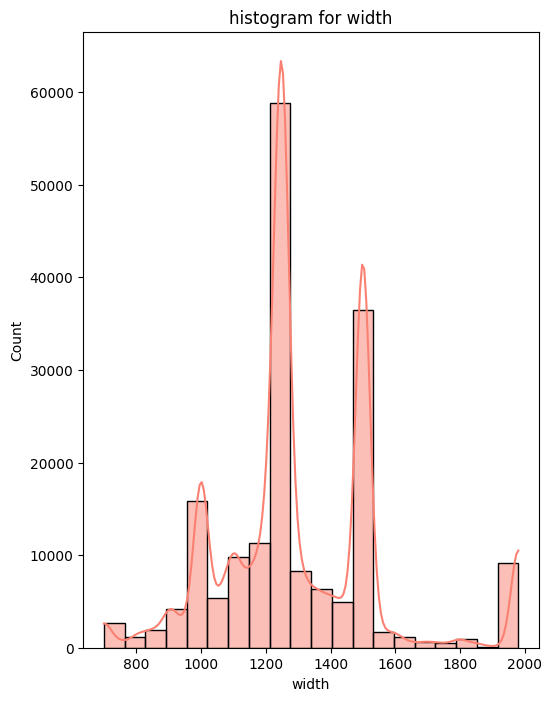

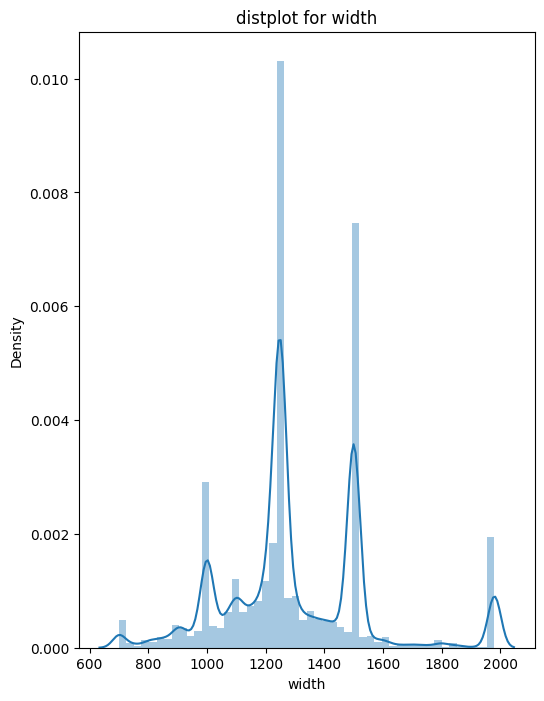

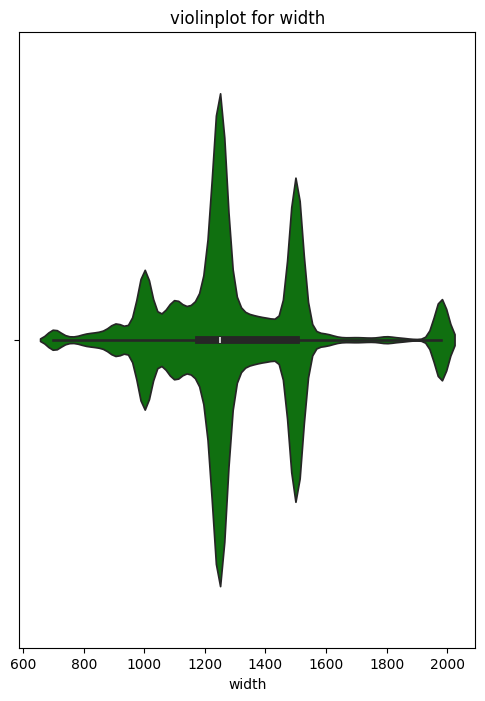

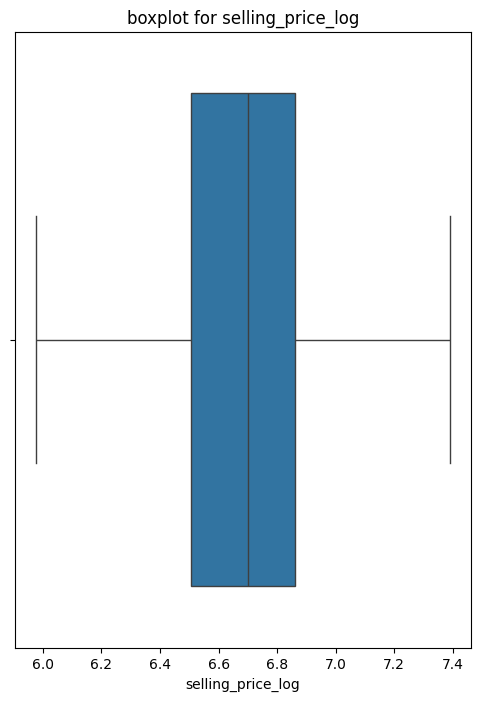

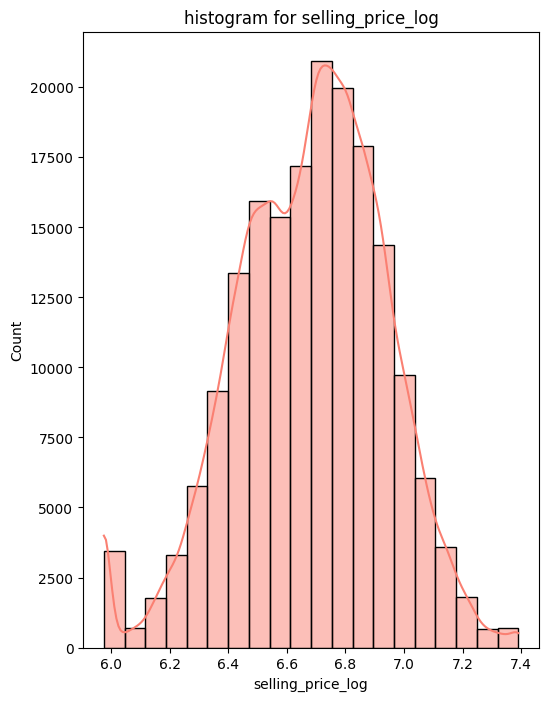

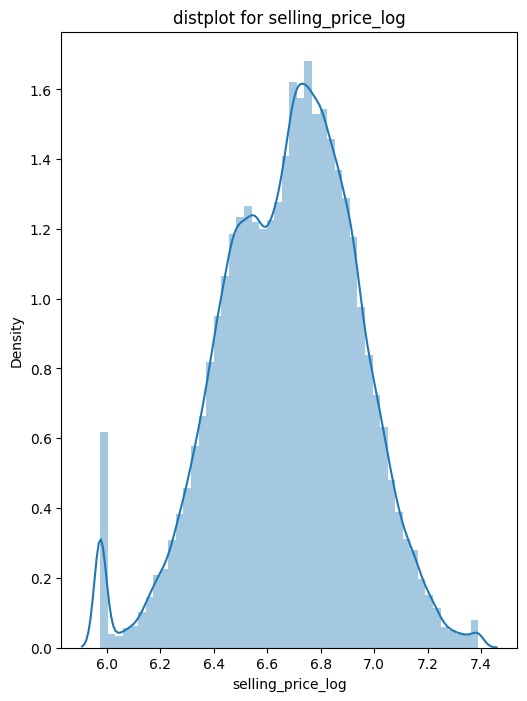

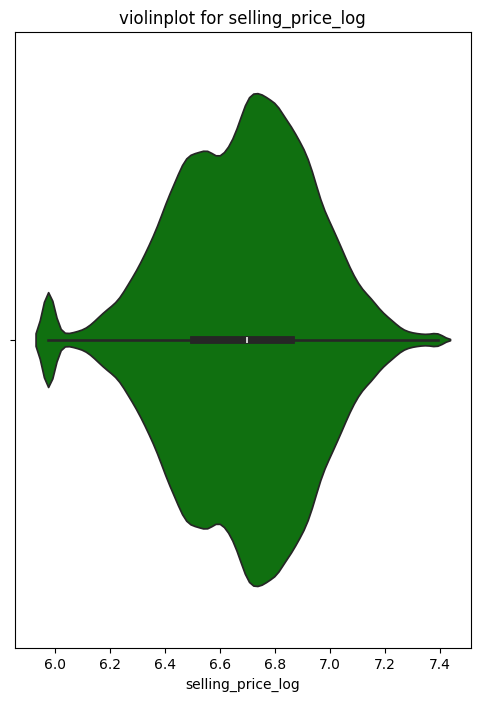

In [48]:
for i in ['quantity tons_log','thickness_log','width','selling_price_log']:
    plot(df1,i)

In [47]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [48]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df2 = df1.drop(columns=['quantity tons','thickness','selling_price'])
df2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [49]:
df2.columns


Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery_date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

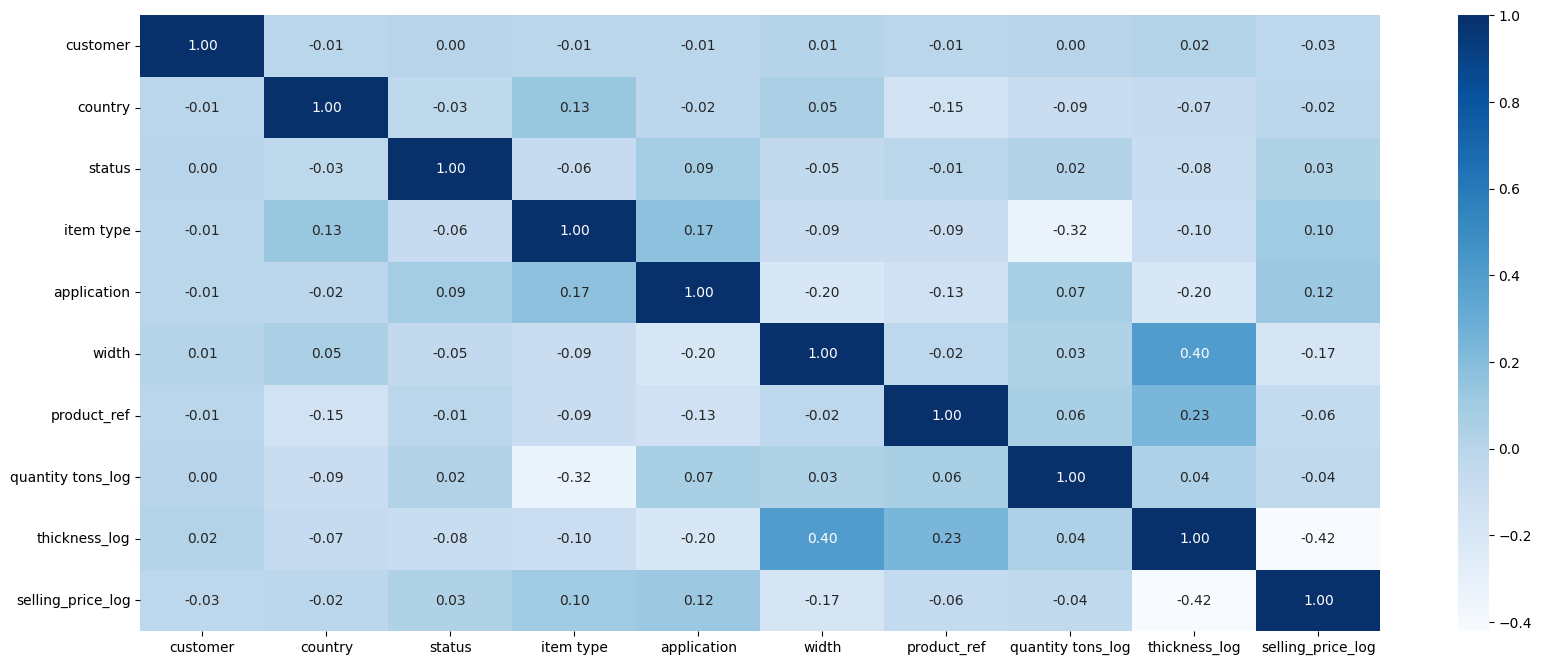

In [50]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

cor = df2.drop(columns=['item_date','delivery date', 'item_date_1','delivery_date_1']).corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True,cmap="Blues",fmt="0.2f")
plt.show()


In [51]:
cor

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
customer,1.000000,-0.006669,0.004775,-0.010901,-0.006869,0.009585,-0.007716,0.002559,0.018860,-0.025967
country,-0.006669,1.000000,-0.028903,0.130025,-0.019304,0.053867,-0.147326,-0.090655,-0.065362,-0.019936
status,0.004775,-0.028903,1.000000,-0.064604,0.085808,-0.053129,-0.008033,0.023800,-0.083867,0.032381
item type,-0.010901,0.130025,-0.064604,1.000000,0.169124,-0.092094,-0.089501,-0.324811,-0.101396,0.095434
application,-0.006869,-0.019304,0.085808,0.169124,1.000000,-0.198878,-0.131784,0.066483,-0.197610,0.119927
width,0.009585,0.053867,-0.053129,-0.092094,-0.198878,1.000000,-0.024106,0.032100,0.401387,-0.172865
product_ref,-0.007716,-0.147326,-0.008033,-0.089501,-0.131784,-0.024106,1.000000,0.064665,0.234190,-0.059385
quantity tons_log,0.002559,-0.090655,0.023800,-0.324811,0.066483,0.032100,0.064665,1.000000,0.041198,-0.039051
thickness_log,0.018860,-0.065362,-0.083867,-0.101396,-0.197610,0.401387,0.234190,0.041198,1.000000,-0.421189
selling_price_log,-0.025967,-0.019936,0.032381,0.095434,0.119927,-0.172865,-0.059385,-0.039051,-0.421189,1.000000


# *WRONG DELIVERY DATE HANDLING*

In [52]:
df3= df2.copy()

In [53]:
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [54]:
df3.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [ ]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.
     

In [55]:

df3["delivery_date_1"] = pd.to_datetime(df3["delivery_date_1"])
df3["item_date_1"] = pd.to_datetime(df3["item_date_1"])

In [56]:
df3.dtypes

item_date                   float64
customer                    float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_1          datetime64[ns]
delivery_date_1      datetime64[ns]
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [57]:
# find the difference between item and delivery date and add the new column of dataframe

df3["date_difference"] = (df3["delivery_date_1"] - df3["item_date_1"]).dt.days
df3.head(5)


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [58]:
# convert the data type using pandas
df3['item_date_1'] = pd.to_datetime(df3['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df3["item_date_day"] = df3["item_date_1"].dt.day
df3["item_date_month"] = df3["item_date_1"].dt.month
df3["item_date_year"] = df3["item_date_1"].dt.year


In [59]:
df3.head(5)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021


In [60]:

# split the non-negative value of 'Date_difference' column in separate dataframe
df_pv = df3[df3["date_difference"]>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_pv.reset_index(drop=True,inplace=True)


In [61]:
df_pv

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,30227718.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30161559.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [62]:
# split the negative value of 'Date_difference' column in another dataframe
df_nv = df3[df3["date_difference"]<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_nv.reset_index(drop=True,inplace=True)
df_nv

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [63]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'delivery date' data (df_f1) and predict the 'Date_difference'(df_f2) using ML model.
     

In [64]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 


In [65]:
df_pv.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery_date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [68]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivary_date(df,algorithm):
    x = df.drop(columns=["item_date_1","delivery_date_1","date_difference"],axis=1)
    y = df["date_difference"]
    model = algorithm().fit(x,y)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    metrics = {"ALGORITHM":algorithm.__name__,
               "MEAN_SQUARED_ERROR":mse,
               "R2":r2,
               "ROOT_MEAN_SQUARED_ERROR":rmse,
               "MEAN_ABSOLUTE_ERROR":mae}
    
    return metrics

In [69]:
print(machine_learning_delivary_date(df_pv,DecisionTreeRegressor))
print(machine_learning_delivary_date(df_pv,ExtraTreesRegressor))
print(machine_learning_delivary_date(df_pv,RandomForestRegressor))
print(machine_learning_delivary_date(df_pv,AdaBoostRegressor))
print(machine_learning_delivary_date(df_pv,GradientBoostingRegressor))
print(machine_learning_delivary_date(df_pv,XGBRegressor))

{'ALGORITHM': 'DecisionTreeRegressor', 'MEAN_SQUARED_ERROR': 0.0, 'R2': 1.0, 'ROOT_MEAN_SQUARED_ERROR': 0.0, 'MEAN_ABSOLUTE_ERROR': 0.0}
{'ALGORITHM': 'ExtraTreesRegressor', 'MEAN_SQUARED_ERROR': 0.0, 'R2': 1.0, 'ROOT_MEAN_SQUARED_ERROR': 0.0, 'MEAN_ABSOLUTE_ERROR': 0.0}
{'ALGORITHM': 'RandomForestRegressor', 'MEAN_SQUARED_ERROR': 0.5464582490260622, 'R2': 0.9996477843827026, 'ROOT_MEAN_SQUARED_ERROR': 0.7392281440976542, 'MEAN_ABSOLUTE_ERROR': 0.005744571618397614}
{'ALGORITHM': 'AdaBoostRegressor', 'MEAN_SQUARED_ERROR': 422.8585464846688, 'R2': 0.7274496555866596, 'ROOT_MEAN_SQUARED_ERROR': 20.563524661027078, 'MEAN_ABSOLUTE_ERROR': 16.965090069785212}
{'ALGORITHM': 'GradientBoostingRegressor', 'MEAN_SQUARED_ERROR': 20.515831395269327, 'R2': 0.9867766728160254, 'ROOT_MEAN_SQUARED_ERROR': 4.529440516804402, 'MEAN_ABSOLUTE_ERROR': 3.2946952365634212}
{'ALGORITHM': 'XGBRegressor', 'MEAN_SQUARED_ERROR': 0.11753646185665918, 'R2': 0.9999242427439945, 'ROOT_MEAN_SQUARED_ERROR': 0.342835910

In [ ]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [70]:
# train the model by using Random Forest Regression algorithm to predict 'Date difference'
# 'item_date_1','delivery date_1' - this columns are non-numerical and cannot passed, so skip the columns in model training and prediction.

def ml_date_difference():
    # train the model by using correct delivery date (df_pv) dataframe
    x = df_pv.drop(columns=['item_date_1','delivery_date_1','date_difference'],axis=1)
    y = df_pv['date_difference']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = RandomForestRegressor().fit(x_train,y_train)
# predict the 'Date_difference' of df_nv columns using model
    y_predt_list = []

    for index,row in df_nv.iterrows():
        input_data = row.drop(['item_date_1','delivery_date_1','date_difference'])
        y_predt = model.predict([input_data])
        y_predt_list.append(y_predt[0])

    return y_predt_list    

In [71]:
df_nv.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery_date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [72]:
df_pv.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery_date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [73]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()
date_difference

[18.03,
 18.03,
 0.0,
 18.04,
 18.04,
 18.03,
 18.03,
 18.03,
 226.14,
 0.0,
 1.0,
 1.0,
 3.16,
 3.17,
 3.16,
 3.16,
 3.17,
 3.16,
 3.16,
 3.16,
 3.17,
 3.16,
 3.16,
 3.17,
 3.17,
 3.15,
 3.16,
 3.16,
 3.16,
 3.16,
 3.16,
 3.16,
 3.17,
 3.17,
 3.17,
 3.17,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.15,
 3.15,
 3.15,
 3.15,
 3.17,
 3.38,
 3.17,
 3.17,
 3.17,
 3.17,
 3.0,
 3.15,
 3.22,
 3.22,
 3.34,
 4.05,
 4.05,
 4.05,
 6.0,
 6.0,
 6.0,
 6.54,
 6.47,
 6.38,
 6.38,
 6.31,
 6.51,
 6.58,
 6.5,
 6.38,
 6.39,
 6.41,
 8.0,
 8.0,
 8.0,
 6.49,
 6.49,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 6.7,
 6.76,
 6.97,
 6.98,
 6.98,
 6.85,
 6.71,
 6.68,
 6.7,
 6.68,
 6.68,
 6.7,
 6.67,
 6.72,
 6.7,
 6.73,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 6.77,
 9.0,
 0.7,
 0.7,
 0.7,
 0.7,
 7.1,
 7.1,
 7.1,
 7.08,
 10.0,
 10.0,
 0.7,
 10.66,
 13.0,
 10.75,
 10.74,
 10.61,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 11.05,
 11.05,
 10.92,
 10.93,
 14.0,
 10.92,
 10.95,
 10.92,
 10.91,
 10.92,
 10.93,
 10.92,
 

In [74]:
len(date_difference)

16108

In [75]:
df_nv.tail(1)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
16107,20200702.0,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,-0.34249,6.408529,-1,2,7,2020


In [76]:
date_difference_1 = [int(round(i,0)) for i in date_difference]
print(date_difference_1) 

[18, 18, 0, 18, 18, 18, 18, 18, 226, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 9, 1, 1, 1, 1, 7, 7, 7, 7, 10, 10, 1, 11, 13, 11, 11, 11, 13, 13, 13, 13, 13, 11, 11, 11, 11, 14, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 14, 13, 13, 13, 13, 13, 13, 13, 1, 13, 1, 14, 1, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 14, 14, 14, 16, 16, 15, 15, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 17, 20, 20, 20, 20, 20, 21, 21, 21, 

In [77]:
# add 'Date_difference' column in the dataframe
df_nv["date_difference"] = pd.DataFrame(date_difference_1)
df_nv

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,18,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,18,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,18,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,18,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [78]:
# calculate delivery date (item_date + Date_difference = delivery_date)

def string_format_time(item_date,date_difference):
    result_date = item_date + timedelta(days=date_difference)
    delivery_date = result_date.strftime("%Y-%m-%d")
    
    return delivery_date


In [79]:
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   item_date          16108 non-null  float64       
 1   customer           16108 non-null  float64       
 2   country            16108 non-null  float64       
 3   status             16108 non-null  int64         
 4   item type          16108 non-null  float64       
 5   application        16108 non-null  float64       
 6   width              16108 non-null  float64       
 7   product_ref        16108 non-null  int64         
 8   delivery date      16108 non-null  float64       
 9   item_date_1        16108 non-null  datetime64[ns]
 10  delivery_date_1    16108 non-null  datetime64[ns]
 11  quantity tons_log  16108 non-null  float64       
 12  thickness_log      16108 non-null  float64       
 13  selling_price_log  16108 non-null  float64       
 14  date_d

In [80]:
# find out the delivery date and add to dataframe
df_nv["item_date_1"] = pd.to_datetime(df_nv["item_date_1"])
df_nv["delivery_date_1"] = df_nv.apply(lambda x : string_format_time(x["item_date_1"],x["date_difference"]),axis=1)


In [81]:
df_nv

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-19,5.956169,-0.967584,6.468211,18,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-19,5.310301,0.832909,6.643790,18,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-19,4.730808,-0.385662,6.836259,18,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-19,4.736160,-0.597837,6.860664,18,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [82]:
# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_pv,df_nv],axis=0,ignore_index=True)

In [83]:
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01 00:00:00,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [84]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)
df_final["delivery_date_1"] = pd.to_datetime(df_final["delivery_date_1"])

df_final["delivery_date_day"] = df_final["delivery_date_1"].dt.day
df_final["delivery_date_month"] = df_final["delivery_date_1"].dt.month
df_final["delivery_date_year"] = df_final["delivery_date_1"].dt.year



In [85]:
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,...,quantity tons_log,thickness_log,selling_price_log,date_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,...,3.991779,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,...,6.643822,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,...,5.419608,0.405465,6.890609,0,1,4,2021,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,...,1.259203,-0.967584,5.975038,91,1,4,2021,1,7,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,...,4.235147,-0.510826,7.217443,91,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,...,4.629691,-0.040822,6.381816,30,2,7,2020,1,8,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,...,5.337954,-0.051293,6.378426,30,2,7,2020,1,8,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,...,1.443523,-0.342490,6.428105,30,2,7,2020,1,8,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,...,3.413291,-0.162519,6.398595,30,2,7,2020,1,8,2020


In [86]:
# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=["item_date","item_date_1","delivery date","date_difference","delivery_date_1"],inplace=True)

In [87]:
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


# **Classification Method Using Status**

In [88]:
read_csv = pd.read_csv("E:/python/project_5/Industrial_Copper/Industrial-Copper.csv")

In [89]:
# pip install imbalanced-learn
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import matplotlib.pyplot as plt
import pickle
     

In [90]:
read_csv.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021


In [91]:
# check the dtypes
read_csv.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons_log      float64
thickness_log          float64
selling_price_log      float64
item_date_day            int64
item_date_month          int64
item_date_year           int64
delivery date_day        int64
delivery date_month      int64
delivery date_year       int64
dtype: object

In [92]:
df_c = read_csv.copy()
df_c


,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [93]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status==1) | (df_c.status==0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [94]:
# check no of rows (records) of each 1 and 0 in dataframe
df_c["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [95]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference
x = df_c.drop("status",axis=1)
y = df_c["status"]

In [96]:
x.shape,y.shape

((150450, 15), (150450,))

In [100]:
x_new,y_new = SMOTETomek().fit_resample(x,y)


In [138]:
x_new.min()

customer                12458.000000
country                    25.000000
item type                   0.000000
application                 2.000000
width                     700.000000
product_ref            611728.000000
quantity tons_log          -0.322334
thickness_log              -1.714798
selling_price_log           5.975038
item_date_day               1.000000
item_date_month             1.000000
item_date_year           2020.000000
delivery date_day           1.000000
delivery date_month         1.000000
delivery date_year       2020.000000
dtype: float64

In [141]:
x_new.max()

customer               2.147484e+09
country                1.130000e+02
item type              6.000000e+00
application            9.900000e+01
width                  1.980000e+03
product_ref            1.722208e+09
quantity tons_log      6.924734e+00
thickness_log          3.281543e+00
selling_price_log      7.390361e+00
item_date_day          3.100000e+01
item_date_month        1.200000e+01
item_date_year         2.021000e+03
delivery date_day      3.100000e+01
delivery date_month    1.200000e+01
delivery date_year     2.022000e+03
dtype: float64

In [102]:
x_new.shape,y_new.shape

((229576, 15), (229576,))

In [103]:

# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new,algorithm):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
    model = algorithm().fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)

    accuracy_metrics = {"ALGORITHM": algorithm.__name__,
                        "ACCURACY_TRAIN":accuracy_train,
                        "ACCURACY_TEST": accuracy_test}
    return accuracy_metrics 



In [104]:
# befor oversampling
print(machine_learning_classification(x, y, DecisionTreeClassifier))
print(machine_learning_classification(x, y, ExtraTreesClassifier))
print(machine_learning_classification(x, y, RandomForestClassifier))
print(machine_learning_classification(x, y, AdaBoostClassifier))
print(machine_learning_classification(x, y, GradientBoostingClassifier))
print(machine_learning_classification(x, y, XGBClassifier))

{'ALGORITHM': 'DecisionTreeClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9529744101030243}
{'ALGORITHM': 'ExtraTreesClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9739780658025923}
{'ALGORITHM': 'RandomForestClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9706214689265537}
{'ALGORITHM': 'AdaBoostClassifier', 'ACCURACY_TRAIN': 0.8152126952475905, 'ACCURACY_TEST': 0.8128281821203057}
{'ALGORITHM': 'GradientBoostingClassifier', 'ACCURACY_TRAIN': 0.8353522765038218, 'ACCURACY_TEST': 0.8333665669657694}
{'ALGORITHM': 'XGBClassifier', 'ACCURACY_TRAIN': 0.9456796277833167, 'ACCURACY_TEST': 0.9322698570953806}


In [105]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'ALGORITHM': 'DecisionTreeClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9667000609809216}
{'ALGORITHM': 'ExtraTreesClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9856912623050789}
{'ALGORITHM': 'RandomForestClassifier', 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9838182768533844}
{'ALGORITHM': 'AdaBoostClassifier', 'ACCURACY_TRAIN': 0.7682130022868344, 'ACCURACY_TEST': 0.7706028399686384}
{'ALGORITHM': 'GradientBoostingClassifier', 'ACCURACY_TRAIN': 0.8192693019710334, 'ACCURACY_TEST': 0.8205200801463542}
{'ALGORITHM': 'XGBClassifier', 'ACCURACY_TRAIN': 0.953985625612545, 'ACCURACY_TEST': 0.9472950605453436}


In [ ]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [132]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [133]:
grid_search.best_score_

0.971599695088751

In [106]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.989197430033758, 0.9735821935708685)

In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data
     

In [107]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22897   202]
 [  979 21838]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23099
           1       0.99      0.96      0.97     22817

    accuracy                           0.97     45916
   macro avg       0.97      0.97      0.97     45916
weighted avg       0.97      0.97      0.97     45916



In [108]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
 
FP,TP,threshold = roc_curve(y_true=y_test,y_score=y_pred)
auc_curve = auc(x=FP,y=TP)
print(auc_curve)

0.9741742139804251


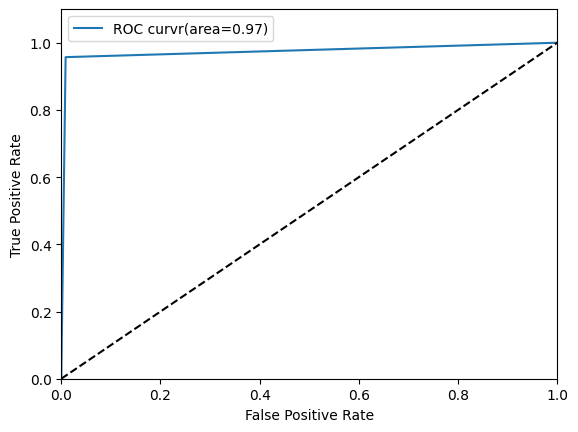

In [109]:
plt.plot(FP,TP,label=f"ROC curvr(area={round(auc_curve,2)})")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()


In [110]:
x_new.head(118)

,customer,country,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30341428.0,38.0,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
4,30202938.0,25.0,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,30197494.0,39.0,5.0,56.0,1050.0,1668701376,3.083873,0.182322,7.025538,1,4,2021,1,8,2021
114,30394817.0,78.0,3.0,10.0,1500.0,640665,3.942014,1.945910,6.948897,1,4,2021,1,7,2021
115,30197494.0,39.0,5.0,56.0,1055.0,1668701376,3.750860,0.182322,7.019297,1,4,2021,1,8,2021
116,30223403.0,78.0,5.0,10.0,1500.0,1668701718,2.165480,0.000000,7.133296,1,4,2021,1,7,2021


In [111]:
x_new.columns

Index(['customer', 'country', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [112]:
# will pass the user data manually to chech the prediction of status at our model
user_data =np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [113]:
user_data = np.array([[30223403.0,78.0,5.0,10.0,1500.0,1668701718,2.165480,0.000000,7.133296,1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


In [114]:
import sklearn
print(sklearn.__version__)

1.3.2


In [115]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

     

In [ ]:
# Now successfully saved our model in 'classification_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the status. (don't need any packages - only need numpy for pass user input)
     

In [116]:
# load pickle model to predict the status (like Trained brain).

with open('E:/python/project_5/Industrial_Copper/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


# ***REGRESSION METHOD - PREDICT SELLING PRICE***

In [117]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [118]:
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [119]:
df_r = df_c.copy()
df_r

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [136]:
df_r.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery date_month',
       'delivery date_year'],
      dtype='object')

In [121]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def accuracy_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [122]:
print(accuracy_regression(df_r, DecisionTreeRegressor))
print(accuracy_regression(df_r, ExtraTreesRegressor))
print(accuracy_regression(df_r, RandomForestRegressor))
print(accuracy_regression(df_r, AdaBoostRegressor))
print(accuracy_regression(df_r, GradientBoostingRegressor))
print(accuracy_regression(df_r, XGBRegressor))
     

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999331046217217, 'R2_test': 0.9288314992907567}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999331046217217, 'R2_test': 0.956493477320206}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9942491912938897, 'R2_test': 0.9596123632149437}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7311240610675858, 'R2_test': 0.7314560176324232}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8914145636976427, 'R2_test': 0.8899228669735377}
{'algorithm': 'XGBRegressor', 'R2_train': 0.952332713465477, 'R2_test': 0.94644431214808}


In [ ]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

# already i explained about GridsearchCV in classification method

In [130]:
x = df_r.drop(columns=['selling_price_log'], axis=1)
y = df_r['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)
     

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [134]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_
     

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9564395224349237)

In [123]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_r.drop(columns=['selling_price_log'], axis=1)
y = df_r['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9886292549216151, 0.9598647371365855)

In [ ]:
# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817

# compare before and after hypertuning, reduced the overfitting in training

In [124]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_r.drop(columns=['selling_price_log'], axis=1)
y = df_r['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r
     

{'R2': 0.9599595556729748,
 'Mean Absolute Error': 0.030370318384410323,
 'Mean Squared Error': 0.0022931336338407626,
 'Root Mean Squared Error': 0.04788667490900535}

In [125]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

6.937160733455758

In [126]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

1029.8420639089218

In [127]:
import sklearn
print(sklearn.__version__)

1.3.2


In [128]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Now successfully saved our model in 'regression_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the selling price. (don't need any packages - only need numpy for pass user input)
     

In [129]:
# load the pickle model to predict selling price

with open('E:/python/project_5/Industrial_Copper/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1029.8420639089218